<h3>Import Necessary Libraries</h3>

In [2]:
import matplotlib.pyplot as plt
import keras.datasets.mnist as mnist
import tensorflow as tf
from keras.layers import Flatten
import numpy as np
import keras

In [5]:
import tensorflow as tf

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# List available devices
devices = tf.config.list_physical_devices()
print("Available devices:")
for device in devices:
    print(device)

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("TensorFlow is using the GPU.")
else:
    print("TensorFlow is not using the GPU.")


TensorFlow version: 2.3.0
Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
TensorFlow is not using the GPU.


<h3>Load MNIST data and do train/test split</h3>

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
y_train=y_train.astype('float32')/255
y_test=y_test.astype('float32')/255
X_image_train=tf.reshape(X_train,[-1,28,28,1])
X_image_train=tf.cast(X_image_train,'float32')
X_image_test = tf.reshape(X_test, [-1,28,28,1]) 
X_image_test = tf.cast(X_image_test, 'float32') 
flatten=Flatten()
X_train=flatten(X_train)
print(X_image_train.shape)
print(X_train.shape)
#X_train.shape

(60000, 28, 28, 1)
(60000, 784)


<h3>Declare variables</h3>

In [ ]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10
global_step = tf.Variable(0)
total_batch = int(len(X_train) / batch_size)
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
encoding_layer = 32 # final encoding bottleneck features
n_input = 784 # MNIST data input (img shape: 28*28)


<h3>Build Model</h3>

In [ ]:
class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.n_hidden_1 = n_hidden_1 # 1st layer num features
        self.n_hidden_2 = n_hidden_2 # 2nd layer num features
        self.encoding_layer = encoding_layer
        self.n_input = n_input # MNIST data input (img shape: 28*28)

        self.flatten_layer = tf.keras.layers.Flatten()
        self.enocoding_1 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.relu)
        self.encoding_2 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.relu)
        self.encoding_final = tf.keras.layers.Dense(self.encoding_layer, activation=tf.nn.relu)
        self.decoding_1 = tf.keras.layers.Dense(self.n_hidden_2, activation=tf.nn.relu)
        self.decoding_2 = tf.keras.layers.Dense(self.n_hidden_1, activation=tf.nn.relu)
        self.decoding_final = tf.keras.layers.Dense(self.n_input,activation=tf.nn.sigmoid)

    def encoder(self,x):
        layer_1 = self.enocoding_1(x)
        layer_2 = self.encoding_2(layer_1)
        code = self.encoding_final(layer_2)
        return code
        

    # Building the decoder
    def decoder(self, x):
        layer_1 = self.decoding_1(x)
        layer_2 = self.decoding_2(layer_1)
        decode = self.decoding_final(layer_2)
        return decode

        
    def call(self, x):
        encoder_op  = self.encoder(x)
        # Reconstructed Images
        y_pred = self.decoder(encoder_op)
        return y_pred
        
def cost(y_true, y_pred):
    loss = keras.losses.mean_squared_error(y_true, y_pred)
    cost = tf.reduce_mean(loss)
    return cost

def grad(model, inputs, targets):
    #print('shape of inputs : ',inputs.shape)
    #targets = flatten_layer(targets)
    with tf.GradientTape() as tape:    
        reconstruction = model(inputs)
        loss_value = cost(targets, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables),reconstruction

<h3>Train Model</h3>

In [ ]:
import keras
from keras import losses
model = AutoEncoder()
optimizer = keras.optimizers.RMSprop(learning_rate)

for epoch in range(training_epochs):
    for i in range(total_batch):
        x_inp = X_train[i : i + batch_size]
        loss_value, grads, reconstruction = grad(model, x_inp, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(loss_value))

print("Optimization Finished!")

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:361: UserWarning: `build()` was called on layer 'auto_encoder', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch: 0001 cost= 0.034448959
Epoch: 0002 cost= 0.021442231
Epoch: 0003 cost= 0.016557902
Epoch: 0004 cost= 0.010415754
Epoch: 0005 cost= 0.010671504
Epoch: 0006 cost= 0.007713539
Epoch: 0007 cost= 0.006034782
Epoch: 0008 cost= 0.007119592
Epoch: 0009 cost= 0.005864813
Epoch: 0010 cost= 0.004921173
Epoch: 0011 cost= 0.004556527
Epoch: 0012 cost= 0.004552141
Epoch: 0013 cost= 0.005201221
Epoch: 0014 cost= 0.005084305
Epoch: 0015 cost= 0.005204241
Epoch: 0016 cost= 0.003231254
Epoch: 0017 cost= 0.003945150
Epoch: 0018 cost= 0.004067153
Epoch: 0019 cost= 0.003726932
Epoch: 0020 cost= 0.003532507
Optimization Finished!


<h3>Apply Model</h3>

In [ ]:
# Applying encode and decode over test set
encode_decode = model(flatten(X_image_test[:examples_to_show]))

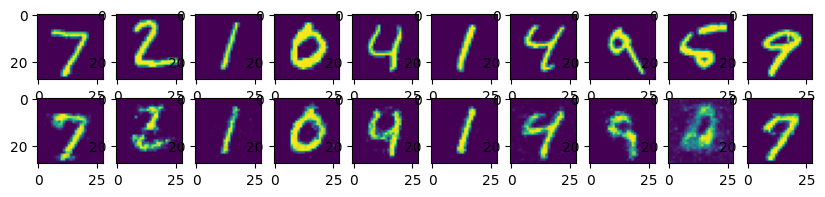

In [ ]:
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(X_image_test[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))